

# Richards' Equation, steady state

This is a simple verticle, pseudo-1D column of water with a water table below the surface.  It solves the pressure to steady-state.  For constant density and incompressible solid, this would be a linear pressure profile. 
# (but we include a pressure-dependent density.)

Input parameters:

1. Mesh size defined using Generated Mesh - Box type.
- Low coordinate - (0,0,0), High coordinate - (1,1,10), number of cells - (1,1,100)
- Creates a pseudo 1D water column with 100 cells along the z-direction.

2. Solves the Richards steady state equation.

For transient state, the equation solved is:



Author: Ethan Coon

In [1]:
%matplotlib inline

In [2]:
import sys,os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools', 'utils'))
import ats_xdmf
import plot_column_data
import numpy as np
from matplotlib import pyplot as plt

In [299]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load the ATS solution
directory = "./richards_steadystate.demo"
vis = ats_xdmf.VisFile(directory)
vis.loadMesh(columnar=True)


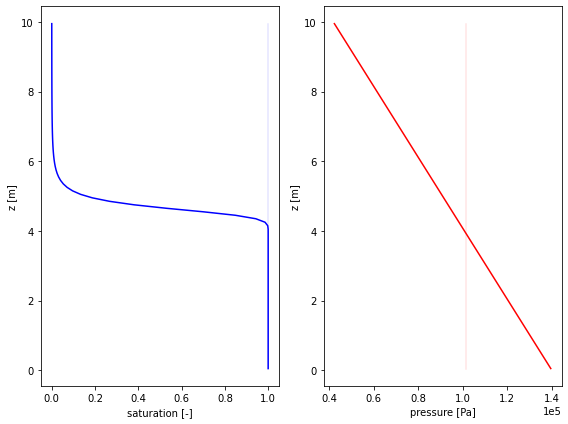

In [4]:
# plot the solution
fig = plt.figure(figsize=(8,6))
axs = fig.subplots(1,2)
plot_column_data.plot_subsurface(vis, ['saturation_liquid',], axs[0], None, 'b')
plot_column_data.plot_subsurface(vis, ['pressure',], axs[1], None, 'r')
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
axs[0].set_xlabel('saturation [-]')
axs[0].set_ylabel('z [m]')
axs[1].set_xlabel('pressure [Pa]')
axs[1].set_ylabel('z [m]')
plt.tight_layout()
plt.show()

VGC parameters: alpha = 0.00015, m = 0.8

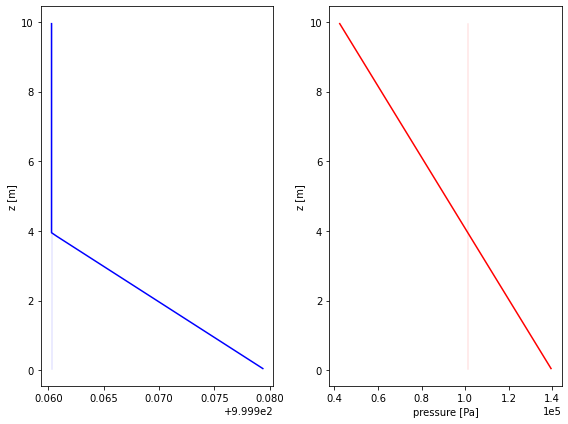

In [21]:
# plot the solution
fig = plt.figure(figsize=(8,6))
axs = fig.subplots(1,2)
plot_column_data.plot_subsurface(vis, ['mass_density_liquid',], axs[0], None, 'b')
plot_column_data.plot_subsurface(vis, ['pressure',], axs[1], None, 'r')
axs[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#axs[0].set_xlabel('mass density liquid [kg m^{-3}]')
axs[0].set_ylabel('z [m]')
axs[1].set_xlabel('pressure [Pa]')
axs[1].set_ylabel('z [m]')
plt.tight_layout()
plt.show()

In [5]:
vis.get

<bound method VisFile.get of <ats_xdmf.VisFile object at 0x7f33d638fc40>>

In [6]:
import h5py

In [26]:
with h5py.File('richards_steadystate.demo/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    darcy_velocity = np.array(hdf.get('darcy_velocity.cell.0'))
    print(darcy_velocity)
    print('\n')
    print(np.array(hdf.get('saturation_liquid.cell.0')))

List of datasets in this file: 
 
 ['capillary_pressure_gas_liq.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_density_liquid.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_liquid.cell.0', 'temperature.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']
['0' '1']


['0' '1']


In [34]:
with h5py.File('richards_steadystate.demo/ats_vis_mesh.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    mesh = np.array(hdf.get('0'))
    print(mesh)
#    print('\n')
#    print(np.array(hdf.get('saturation_liquid.cell.0')))

List of datasets in this file: 
 
 ['0']
['Mesh']


In [33]:
mesh

array(['Mesh'], dtype='<U4')

In [52]:
with h5py.File('richards_steadystate.demo/checkpoint_final.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    pressure_boundary_face = np.array(hdf.get('pressure.boundary_face.0'))
    print(pressure_boundary_face)
    print('\n')

    #print(np.array(hdf.get('saturation_liquid.cell.0')))

List of datasets in this file: 
 
 ['darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_flux.face.0', 'mass_flux_direction.face.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.boundary_face.0', 'pressure.cell.0', 'temperature.boundary_face.0', 'temperature.cell.0', 'upwind_relative_permeability.face.0']
[[101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.]
 [101325.

In [54]:
 with h5py.File('richards_steadystate.demo/checkpoint_final.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    permeability = np.array(hdf.get('permeability.cell.0'))
    print('Unique values of permeability = ',np.unique(permeability))
    print('\n')
    
    pressure_boundary_face = np.array(hdf.get('pressure.boundary_face.0'))
    print('Unique values of pressure at boundary face = ',np.unique(pressure_boundary_face))
    print('\n')
    
    temperature_boundary_face = np.array(hdf.get('temperature.boundary_face.0'))
    print('Unique values of temperature at boundary face = ',np.unique(temperature_boundary_face))
    
    upwind_relative_permeability = np.array(hdf.get('upwind_relative_permeability.face.0'))
    print('Unique values of permeability',np.unique(upwind_relative_permeability.shape))

List of datasets in this file: 
 
 ['darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_flux.face.0', 'mass_flux_direction.face.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.boundary_face.0', 'pressure.cell.0', 'temperature.boundary_face.0', 'temperature.cell.0', 'upwind_relative_permeability.face.0']


Unique values of permeability =  [2.5e-12]


Unique values of pressure at boundary face =  [101325. 140000.]


Unique values of temperature at boundary face =  [275.15]
Unique values of permeability [  1 501]


In [56]:
 with h5py.File('richards_steadystate.demo/checkpoint_final.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    
    upwind_relative_permeability = np.array(hdf.get('upwind_relative_permeability.face.0'))
    print('Relative permeability: ',upwind_relative_permeability.shape)

List of datasets in this file: 
 
 ['darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_flux.face.0', 'mass_flux_direction.face.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.boundary_face.0', 'pressure.cell.0', 'temperature.boundary_face.0', 'temperature.cell.0', 'upwind_relative_permeability.face.0']


Relative permeability:  (501, 1)


In [61]:
 with h5py.File('richards_steadystate.demo/checkpoint_final.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    pressure = np.array(hdf.get('pressure.cell.0'))
    print('Pressure = ',pressure)
    print('\n')


List of datasets in this file: 
 
 ['darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_flux.face.0', 'mass_flux_direction.face.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.boundary_face.0', 'pressure.cell.0', 'temperature.boundary_face.0', 'temperature.cell.0', 'upwind_relative_permeability.face.0']


Pressure =  [[139509.67761375]
 [138529.03308167]
 [137548.38903041]
 [136567.74545998]
 [135587.10237036]
 [134606.45976157]
 [133625.8176336 ]
 [132645.17598645]
 [131664.53482013]
 [130683.89413462]
 [129703.25392994]
 [128722.61420608]
 [127741.97496304]
 [126761.33620082]
 [125780.69791942]
 [124800.06011884]
 [123819.42279909]
 [122838.78596015]
 [121858.14960204]
 [120877.51372474]
 [119896.87832826]
 [118916.24341261]
 [117935.60897777]
 [116954.97502374]
 [115974.34155054]
 [114993.70855815]
 [114013.07604658]
 [113032.44401583]
 [112051.81246589]
 [111071.18139677]
 [110090.55080846]
 [109109.92070097]
 [108129.29107429]
 [107148.66192843

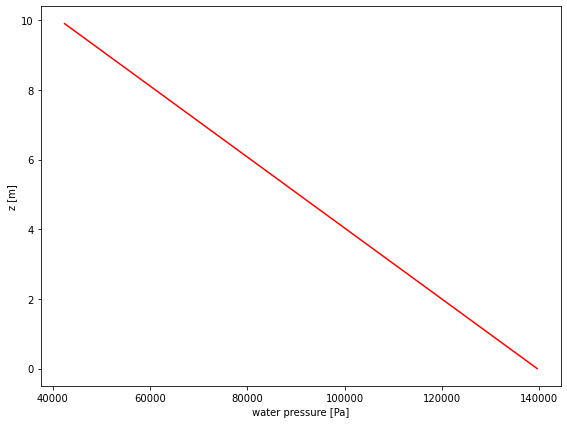

In [78]:
### Plotting pressure:

# z- coordinate - creating a range from 0 - 10 m
z = np.arange(0,10,0.1)


fig = plt.figure(figsize=(8,6))

plt.plot(pressure, z, 'r')
plt.ylabel('z [m]')
plt.xlabel('water pressure [Pa]')
plt.tight_layout()
plt.show()

Q - What is the equation describing this linear behaviour? - 
Hydraulic head = Pressure head + Elevation head
As z increases, Pressure head decreases (since hydraulic head remains constant) - Since it is a variably saturated zone, doesnt the pressure head also decrease as matric potential decreases as z increases from bottom?

In [84]:
import pandas as pd

In [132]:
# Extracting the boundary face pressure data
pressure_boundary_face.flatten()

TypeError: 'tuple' object is not callable

In [113]:

pressure_1D = pressure.flatten()

In [133]:
### Creating a pandas dataframe for heads

# Creating a z - coordinate (from 0, 10 at 0.1 intervals, therefore 100 units)
z = np.arange(0,10,0.1)
data = pd.DataFrame(data=pressure_1D,index=z,columns=['Water Pressure [Pa]'])

rho = 1000 # kg m^{-3} - Provided by the developer 
g = 9.8006 # ms^{-2} - Provided by the user, g = (0,0,-9.8006m ms^{-2})

data['Pressure head [m]'] = data['Water Pressure [Pa]']/(rho*g)

data['Elevation head [m]'] = data.index

data['Hydraulic head [m]'] = data['Pressure head [m]'] + data['Elevation head [m]']

data['Atmospheric pressure head [m]'] = 101325/(rho*g)
data

,Water Pressure [Pa],Pressure head [m],Elevation head [m],Hydraulic head [m],Atmospheric pressure head [m]
0.0,139509.677614,14.234810,0.0,14.234810,10.338653
0.1,138529.033082,14.134750,0.1,14.234750,10.338653
0.2,137548.389030,14.034691,0.2,14.234691,10.338653
0.3,136567.745460,13.934631,0.3,14.234631,10.338653
0.4,135587.102370,13.834572,0.4,14.234572,10.338653
...,...,...,...,...,...
9.5,46349.838336,4.729286,9.5,14.229286,10.338653
9.6,45369.212286,4.629228,9.6,14.229228,10.338653
9.7,44388.586235,4.529170,9.7,14.229170,10.338653
9.8,43407.960185,4.429113,9.8,14.229113,10.338653


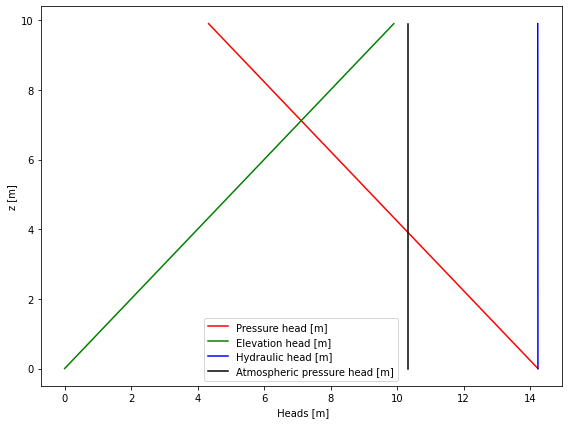

In [136]:

fig = plt.figure(figsize=(8,6))

plt.plot(data['Pressure head [m]'], z, 'r', label='Pressure head [m]')
plt.plot(data['Elevation head [m]'], z, 'g', label='Elevation head [m]')
plt.plot(data['Hydraulic head [m]'], z, 'b', label='Hydraulic head [m]')
plt.plot(data['Atmospheric pressure head [m]'], z, 'k', label='Atmospheric pressure head [m]')
plt.ylabel('z [m]')
plt.xlabel(' Heads [m]')
plt.legend()
plt.tight_layout()
plt.show()

Q - What is the relationship between the atmospheric pressure at the boundary surface and the water pressure within the system?

In [138]:
# Checking out the checkpoint00001.h5 file
with h5py.File('richards_steadystate.demo/checkpoint00001.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    pressure = np.array(hdf.get('pressure.boundary_face.0'))
    print('Pressure = ',pressure.shape)
    print('\n')
# Nothing different

List of datasets in this file: 
 
 ['darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_flux.face.0', 'mass_flux_direction.face.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.boundary_face.0', 'pressure.cell.0', 'temperature.boundary_face.0', 'temperature.cell.0', 'upwind_relative_permeability.face.0']


Pressure =  (402, 1)




In [7]:
import wrm_vangenuchten
import plot_wrm

In [83]:
pressure/(rho*g) - np.array(z)

array([[14.23480987, 14.13480987, 14.03480987, ...,  4.53480987,
         4.43480987,  4.33480987],
       [14.13475023, 14.03475023, 13.93475023, ...,  4.43475023,
         4.33475023,  4.23475023],
       [14.03469063, 13.93469063, 13.83469063, ...,  4.33469063,
         4.23469063,  4.13469063],
       ...,
       [ 4.52917028,  4.42917028,  4.32917028, ..., -5.17082972,
        -5.27082972, -5.37082972],
       [ 4.42911252,  4.32911252,  4.22911252, ..., -5.27088748,
        -5.37088748, -5.47088748],
       [ 4.32905477,  4.22905477,  4.12905477, ..., -5.37094523,
        -5.47094523, -5.57094523]])

In [192]:
### Moles to kg for water
molar_mass_water = 18.015 # g/mol
# Assume 50 moles - how much grams does it weigh?
water_moles = 50
water_mass = 18.015 * 50
water_mass

900.75

In [272]:
# The file is always stored as /0 (at initial instance) or /1 (at time instance 1)

# Printing all the quantities at time instance = 0
print('Printing all the quantities at initial instance = 0 \n')
print('Values are assigned for each of the 100 cells \n')
print('U - User, D - Developer \n')

with h5py.File('richards_steadystate.demo/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    
    cell_volume_all_0 = np.array(hdf.get('cell_volume.cell.0/0'))
    cell_volume_0 = np.unique(cell_volume_all_0.flatten())
    print('Cell volume = ', cell_volume_0[0],'m^3 (U)') # Why 0.1 multiple times?
    print('\n')
    
    mass_density_all_0 = np.array(hdf.get('mass_density_liquid.cell.0/0'))
    mass_density_0 = np.unique(mass_density_all_0.flatten())
    print('Mass density [rho_w] = ',mass_density_0, 'kg m^{-3} (D)') # Assigned by developer
    print('\n')
    
    molar_density_all_0 = np.array(hdf.get('molar_density_liquid.cell.0/0'))
    molar_density_0 = np.unique(molar_density_all_0.flatten())
    print('Molar density of water [n_l] = ',molar_density_0, 'mol m^{-3} (D)') # Assigned by developer
    print('\n')
    
    permeability_all_0 = np.array(hdf.get('permeability.cell.0/0'))
    permeability_0 = np.unique(permeability_all_0.flatten())
    print('Absolute permeability [K] = ',permeability_0, ' m^{2} (U)') # Assigned by user
    print('\n')
    
    porosity_all_0 = np.array(hdf.get('porosity.cell.0/0'))
    porosity_0 = np.unique(porosity_all_0.flatten())
    print('Porosity [phi] = ',porosity_0, ' [-] (U)') # Assigned by user
    print('\n')
    
    pressure_all_0 = np.array(hdf.get('pressure.cell.0/0'))
    pressure_0 = np.unique(pressure_all_0.flatten())
    print('Initial atmospheric pressure (at boundary faces and cells?) [p] = ',pressure_0, ' [Pa] (U)') # Assigned by user
    print('\n')
    
    relative_permeability_all_0 = np.array(hdf.get('relative_permeability.cell.0/0'))
    relative_permeability_0 = np.unique(relative_permeability_all_0.flatten())
    print('Relative permeability (Calculated by upwind with Darcy flux) [kr] = ',relative_permeability_0, ' [-] (U)') # Assigned by user with a method
    print('\n')
    
    saturation_gas_all_0 = np.array(hdf.get('saturation_gas.cell.0/0'))
    saturation_gas_0 = np.unique(saturation_gas_all_0.flatten())
    print('Saturation of gas [s_g] = ',saturation_gas_0, ' [-] (D)') # Assigned by DEVELOPER
    print('\n')
    
    saturation_liquid_all_0 = np.array(hdf.get('saturation_liquid.cell.0/0'))
    saturation_liquid_0 = np.unique(saturation_liquid_all_0.flatten())
    print('Saturation of liquid [s_l] = ',saturation_liquid_0, ' [-] (D)- Fully saturated') # Assigned by DEVELOPER
    print('\n')
    
    temperature_all_0 = np.array(hdf.get('temperature.cell.0/0'))
    temperature_0 = np.unique(temperature_all_0.flatten())
    print('Temperature [T] (at boundary faces and cells?) = ',temperature_0, ' [K] (U)') # Assigned by user
    print('\n')
    
    viscosity_liquid_all_0 = np.array(hdf.get('viscosity_liquid.cell.0/0'))
    viscosity_liquid_0 = np.unique(viscosity_liquid_all_0.flatten())
    print('viscosity_liquid [v] = ',viscosity_liquid_0, ' [Pas] (D)') # Assigned by user
    print('\n')
    
    water_content_all_0 = np.array(hdf.get('water_content.cell.0/0'))
    water_content_0 = np.unique(water_content_all_0.flatten())
    print('water_content [theta] = ',water_content_0[0], ' [mol] (U & D)') # Assigned by user through Richards water content
    ### Moles to kg for water
    molar_mass_water = 18.015 # g/mol
    water_mass = 18.015 * 50
    print('\n')
    print('water_content [theta] = ',water_content_0[0]*molar_mass_water/1000, ' [Kg] (U)') 
    print('\n')
    print('richards_water_content [theta = phi*s*n_l*cellvolume]',porosity_0*saturation_liquid_0*molar_density_0*cell_volume_0[0], ' [mol] (U & D)')
    water_mass
    print('\n')
    
    

Printing all the quantities at initial instance = 0 

Values are assigned for each of the 100 cells 

U - User, D - Developer 

List of datasets in this file: 
 
 ['capillary_pressure_gas_liq.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_density_liquid.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_liquid.cell.0', 'temperature.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']


Cell volume =  0.09999999999999964 m^3 (U)


Mass density [rho_w] =  [999.96028211] kg m^{-3} (D)


Molar density of water [n_l] =  [55506.16876284] mol m^{-3} (D)


Absolute permeability [K] =  [2.5e-12]  m^{2} (U)


Porosity [phi] =  [0.25]  [-] (U)


Initial atmospheric pressure (at boundary faces and cells?) [p] =  [101325.]  [Pa] (U)


Relative permeability (Calculated by upwind with Darcy flux) [kr] =  [3.32744

In [217]:
### Storing the parameters as dataframes


In [232]:
# The file is always stored as /0 (at initial instance) or /1 (at time instance 1)

# Printing all the quantities at time instance = 0
print('Printing all the quantities at initial instance = 1 \n')
print('Values are assigned for each of the 100 cells \n')
print('U - User, D - Developer \n')

with h5py.File('richards_steadystate.demo/ats_vis_data.h5','r') as hdf:
    ls = list(hdf.keys())
    print('List of datasets in this file: \n \n', ls)
    print('\n')
    
    # Cell_volume
    cell_volume_all = np.array(hdf.get('cell_volume.cell.0/1'))
    cell_volume = cell_volume_all.flatten()
    
    # Storing the variables/constants in a dataframe - Do we have a direct function to do this? 
    # Can we simplify the code?
    z = np.arange(0.0,10.0,0.1)
    data_results = pd.DataFrame(index=z,data=cell_volume,columns=['cell_volume'])

    mass_density_all = np.array(hdf.get('mass_density_liquid.cell.0/1'))
    mass_density = mass_density_all.flatten()
    data_results['mass_density [rho_l] [kg m^{-3}]'] = mass_density


    
    molar_density_all = np.array(hdf.get('molar_density_liquid.cell.0/1'))
    molar_density = molar_density_all.flatten()
    data_results['molar_density [n_l] [mol m^{-3}]'] = molar_density

    
    permeability_all = np.array(hdf.get('permeability.cell.0/1'))
    permeability = permeability_all.flatten()
    data_results['Absolute permeability [K] (m^{2})'] = permeability

    
    
    porosity_all = np.array(hdf.get('porosity.cell.0/1'))
    porosity = porosity_all.flatten()
    data_results['Porosity [phi] (-)'] = porosity

    pressure_all = np.array(hdf.get('pressure.cell.0/1'))
    pressure = pressure_all.flatten()
    data_results['Water pressure [p] [Pa]'] = pressure 
    # Water pressure or total pressure (Atm + water)? - Probably both
    
    relative_permeability_all = np.array(hdf.get('relative_permeability.cell.0/1'))
    relative_permeability = relative_permeability_all.flatten()
    data_results['Relative permeability [kr] [-]'] = relative_permeability

    
    saturation_gas_all = np.array(hdf.get('saturation_gas.cell.0/1'))
    saturation_gas = saturation_gas_all.flatten()
    data_results['Saturation of gas [s_g] [-]'] = saturation_gas

    
    saturation_liquid_all = np.array(hdf.get('saturation_liquid.cell.0/1'))
    saturation_liquid = saturation_liquid_all.flatten()
    data_results['Saturation of liquid [s_l] [-]'] = saturation_liquid

    
    temperature_all = np.array(hdf.get('temperature.cell.0/1'))
    temperature = temperature_all.flatten()
    data_results['Temperature [T] [K]'] = temperature

    
    viscosity_liquid_all = np.array(hdf.get('viscosity_liquid.cell.0/1'))
    viscosity_liquid = viscosity_liquid_all.flatten()
    data_results['viscosity_liquid [v] Pas]'] = viscosity_liquid

    
    water_content_all = np.array(hdf.get('water_content.cell.0/1'))
    water_content = water_content_all.flatten()
    data_results['water_content [theta] mols'] = water_content

data_results
    

Printing all the quantities at initial instance = 1 

Values are assigned for each of the 100 cells 

U - User, D - Developer 

List of datasets in this file: 
 
 ['capillary_pressure_gas_liq.cell.0', 'cell_volume.cell.0', 'darcy_velocity.cell.0', 'darcy_velocity.cell.1', 'darcy_velocity.cell.2', 'mass_density_liquid.cell.0', 'molar_density_liquid.cell.0', 'permeability.cell.0', 'porosity.cell.0', 'pressure.cell.0', 'relative_permeability.cell.0', 'saturation_gas.cell.0', 'saturation_liquid.cell.0', 'temperature.cell.0', 'viscosity_liquid.cell.0', 'water_content.cell.0']




,cell_volume,mass_density [rho_l] [kg m^{-3}],molar_density [n_l] [mol m^{-3}],Absolute permeability [K] (m^{2}),Porosity [phi] (-),Water pressure [p] [Pa],Relative permeability [kr] [-],Saturation of gas [s_g] [-],Saturation of liquid [s_l] [-],Temperature [T] [K],viscosity_liquid [v] Pas],water_content [theta] mols
0.0,0.1,999.979374,55507.228505,2.500000e-12,0.25,139509.677614,3.327507e+00,0.000000,1.000000,275.15,0.001668,1387.680713
0.1,0.1,999.978883,55507.201289,2.500000e-12,0.25,138529.033082,3.327505e+00,0.000000,1.000000,275.15,0.001668,1387.680032
0.2,0.1,999.978393,55507.174073,2.500000e-12,0.25,137548.389030,3.327504e+00,0.000000,1.000000,275.15,0.001668,1387.679352
0.3,0.1,999.977903,55507.146857,2.500000e-12,0.25,136567.745460,3.327502e+00,0.000000,1.000000,275.15,0.001668,1387.678671
0.4,0.1,999.977412,55507.119641,2.500000e-12,0.25,135587.102370,3.327501e+00,0.000000,1.000000,275.15,0.001668,1387.677991
...,...,...,...,...,...,...,...,...,...,...,...,...
9.5,0.1,999.960282,55506.168763,2.500000e-12,0.25,46349.838336,2.153636e-11,0.999784,0.000216,275.15,0.001668,0.300083
9.6,0.1,999.960282,55506.168763,2.500000e-12,0.25,45369.212286,1.741937e-11,0.999799,0.000201,275.15,0.001668,0.279594
9.7,0.1,999.960282,55506.168763,2.500000e-12,0.25,44388.586235,1.414143e-11,0.999812,0.000188,275.15,0.001668,0.260824
9.8,0.1,999.960282,55506.168763,2.500000e-12,0.25,43407.960185,1.152126e-11,0.999824,0.000176,275.15,0.001668,0.243604


## Plotting the parameters

### Plotting the pressure:

In [236]:
np.mean(mass_density)

999.9640947054022

In [238]:


rho_avg = np.mean(mass_density) # kg m^{-3} - Provided by the developer 
g = 9.8006 # ms^{-2} - Provided by the user, g = (0,0,-9.8006m ms^{-2})

data_results['Pressure head [m]'] = data_results['Water pressure [p] [Pa]']/(rho_avg*g)

data_results['Elevation head [m]'] = data_results.index

data_results['Hydraulic head [m]'] = data_results['Pressure head [m]'] + data_results['Elevation head [m]']

data_results['Atmospheric pressure head [m]'] = 101325/(rho_avg*g)

data_results

,cell_volume,mass_density [rho_l] [kg m^{-3}],molar_density [n_l] [mol m^{-3}],Absolute permeability [K] (m^{2}),Porosity [phi] (-),Water pressure [p] [Pa],Relative permeability [kr] [-],Saturation of gas [s_g] [-],Saturation of liquid [s_l] [-],Temperature [T] [K],viscosity_liquid [v] Pas],water_content [theta] mols,Pressure head [m],Elevation head [m],Hydraulic head [m],Atmospheric pressure head [m]
0.0,0.1,999.979374,55507.228505,2.500000e-12,0.25,139509.677614,3.327507e+00,0.000000,1.000000,275.15,0.001668,1387.680713,14.235321,0.0,14.235321,10.339024
0.1,0.1,999.978883,55507.201289,2.500000e-12,0.25,138529.033082,3.327505e+00,0.000000,1.000000,275.15,0.001668,1387.680032,14.135258,0.1,14.235258,10.339024
0.2,0.1,999.978393,55507.174073,2.500000e-12,0.25,137548.389030,3.327504e+00,0.000000,1.000000,275.15,0.001668,1387.679352,14.035195,0.2,14.235195,10.339024
0.3,0.1,999.977903,55507.146857,2.500000e-12,0.25,136567.745460,3.327502e+00,0.000000,1.000000,275.15,0.001668,1387.678671,13.935131,0.3,14.235131,10.339024
0.4,0.1,999.977412,55507.119641,2.500000e-12,0.25,135587.102370,3.327501e+00,0.000000,1.000000,275.15,0.001668,1387.677991,13.835068,0.4,14.235068,10.339024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.5,0.1,999.960282,55506.168763,2.500000e-12,0.25,46349.838336,2.153636e-11,0.999784,0.000216,275.15,0.001668,0.300083,4.729456,9.5,14.229456,10.339024
9.6,0.1,999.960282,55506.168763,2.500000e-12,0.25,45369.212286,1.741937e-11,0.999799,0.000201,275.15,0.001668,0.279594,4.629394,9.6,14.229394,10.339024
9.7,0.1,999.960282,55506.168763,2.500000e-12,0.25,44388.586235,1.414143e-11,0.999812,0.000188,275.15,0.001668,0.260824,4.529333,9.7,14.229333,10.339024
9.8,0.1,999.960282,55506.168763,2.500000e-12,0.25,43407.960185,1.152126e-11,0.999824,0.000176,275.15,0.001668,0.243604,4.429272,9.8,14.229272,10.339024


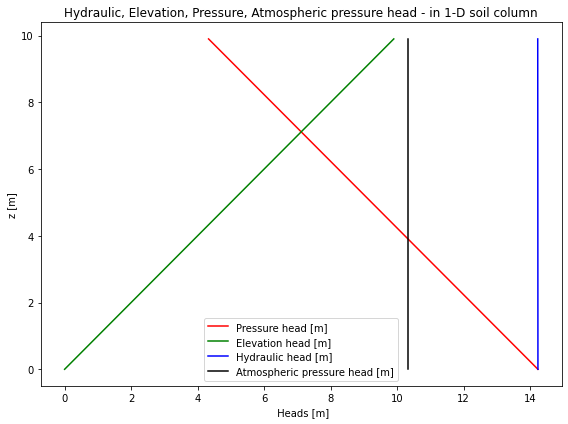

In [241]:

fig = plt.figure(figsize=(8,6))

plt.title('Hydraulic, Elevation, Pressure, Atmospheric pressure head - in 1-D soil column')
plt.plot(data_results['Pressure head [m]'], z, 'r', label='Pressure head [m]')
plt.plot(data_results['Elevation head [m]'], z, 'g', label='Elevation head [m]')
plt.plot(data_results['Hydraulic head [m]'], z, 'b', label='Hydraulic head [m]')
plt.plot(data_results['Atmospheric pressure head [m]'], z, 'k', label='Atmospheric pressure head [m]')
plt.ylabel('z [m]')
plt.xlabel(' Heads [m]')
plt.legend()
plt.tight_layout()
plt.show()

* Is the pressure head - water pressure head or absolute pressure head (absolute head = pressure_head + atmospheric pressure head)
* Note the point where the pressure head reduces below atmospheric pressure! - This is the point where the s_l decreases from 1.

In [306]:
z_drop = data_results[data_results['Water pressure [p] [Pa]'].le(101325)].index[0]

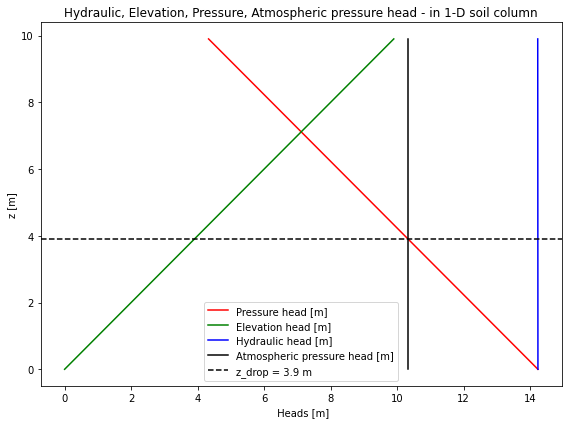

In [310]:

fig = plt.figure(figsize=(8,6))

plt.title('Hydraulic, Elevation, Pressure, Atmospheric pressure head - in 1-D soil column')
plt.plot(data_results['Pressure head [m]'], z, 'r', label='Pressure head [m]')
plt.plot(data_results['Elevation head [m]'], z, 'g', label='Elevation head [m]')
plt.plot(data_results['Hydraulic head [m]'], z, 'b', label='Hydraulic head [m]')
plt.plot(data_results['Atmospheric pressure head [m]'], z, 'k', label='Atmospheric pressure head [m]')
plt.axhline(y=z_drop,color='k',linestyle='--',label='z_drop = 3.9 m')
plt.ylabel('z [m]')
plt.xlabel(' Heads [m]')
plt.legend()
plt.tight_layout()
plt.show()

In [258]:
# Density dependent pressure or pressure dependent density?
# fig = plt.figure(figsize=(8,6))

#plt.title('Pressure dependent density')
#plt.plot(data_results['Pressure head [m]'], data_results['mass_density [rho_l] [kg m^{-3}]'], 'r')

#plt.xlabel('Pressure head [m]')
#plt.ylabel(' Mass density [kg m^{-3}]')
#plt.tight_layout()
#plt.show()

- How is pressure related to density of water? - water pressure (p) = rho * g * H

### Plotting relative permeability

In [264]:
data_results.columns

Index(['cell_volume', 'mass_density [rho_l] [kg m^{-3}]',
       'molar_density [n_l] [mol m^{-3}]', 'Absolute permeability [K] (m^{2})',
       'Porosity [phi] (-)', 'Water pressure [p] [Pa]',
       'Relative permeability [kr] [-]', 'Saturation of gas [s_g] [-]',
       'Saturation of liquid [s_l] [-]', 'Temperature [T] [K]',
       'viscosity_liquid [v] Pas]', 'water_content [theta] mols',
       'Pressure head [m]', 'Elevation head [m]', 'Hydraulic head [m]',
       'Atmospheric pressure head [m]'],
      dtype='object')

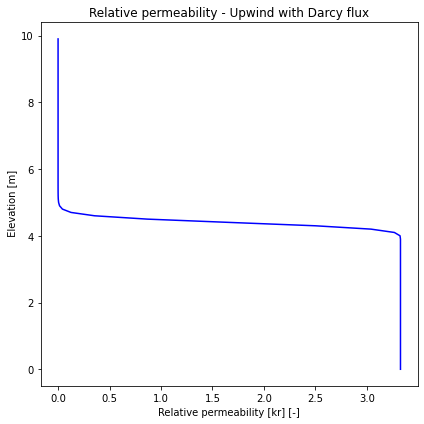

In [269]:
fig = plt.figure(figsize=(6,6))

plt.title('Relative permeability - Upwind with Darcy flux')
plt.plot(data_results['Relative permeability [kr] [-]'],z, 'b')

plt.xlabel('Relative permeability [kr] [-]')
plt.ylabel(' Elevation [m]')
plt.tight_layout()
#plt.show()

- How is the relative permeability calculated? - Van Genuchten Maulem model

### Van-Genuchten Maulem  Model

#### Defined in the function - $wrm_{vangenuchten}$

The retention curve as given by ~\cite{schuh2017soil}  :

If $P_c$ > 0, $S_*$ ($P_c$) = $S_r$ + (1 - $S_r$) $[1 + (\alpha P_c)^n]^{-m}$

else $S_*$ ($P_c$) = 1


Combined with the Mualem (1976) model for re-scaling liquid phase permeability:
\begin{equation}
    k_{r1} = (s_l)^{0.5}[1 - (1 - (s_l)^{\frac{1}{m}})^{m}]^{2}
\end{equation}

where, $S_*$ - Retention curve for unfrozen liquid-gas phase, $S_r$ (-) - Residual saturation, $P_c$ (Pa) - Capillary pressure, and $\alpha$ ($Pa^{-1}$), and m = 1 - 1/n - model parameters, $s_l$ = saturation of liquid

The saturation of liquid and gas is equal to 1, i.e,

$s_l + s_g = 1$

and 

$ s_l = S_*(

The exponent m controls the shape of the soil retention curve and can be related to the pore size distribution of the texture, where larger values corresponds to smaller pore size variability i.e. to well-sorted textures.

Combined with the Mualem (1976) model for re-scaling liquid phase permeability:
\begin{equation}
    k_{r1} = (s_l)^{0.5}[1 - (1 - (s_l)^{\frac{1}{m}})^{m}]^{2}
\end{equation}

Q - Can $P_c$ be taken as the water pressure? - I can't or what does capillary pressure mean for them!

#### Calculating the saturation based on VanGenuchten's model


In [285]:
data_results['Water pressure [p] [Pa]'].describe()

count       100.000000
mean      90968.372767
std       28449.493470
min       42427.334135
25%       66697.828874
50%       90968.323610
75%      115238.866806
max      139509.677614
Name: Water pressure [p] [Pa], dtype: float64

In [286]:
data_results_VGC = pd.DataFrame(data=data_results['Water pressure [p] [Pa]'].values,index=

4

In [289]:
data_results_VGC['ad'] = data_results['Water pressure [p] [Pa]']*10

In [295]:
##### Parameters that we assigned:
alpha = 0.00015
m = 0.8
Sr = 0
n = 1/(1-m)
data_results_VGC = data_results.copy()
#data_results_VGC['S_*'] = Sr + (1 - Sr) * pow(1 + pow(alpha*data_results_VGC['Water pressure [p] [Pa]'],n),(-m))
data_results_VGC['S_*(Pc)'] =  pow(1 + pow(alpha * data_results['Water pressure [p] [Pa]'],n),(-m))


How do you find out saturation of the liquid?

### Plotting saturation :

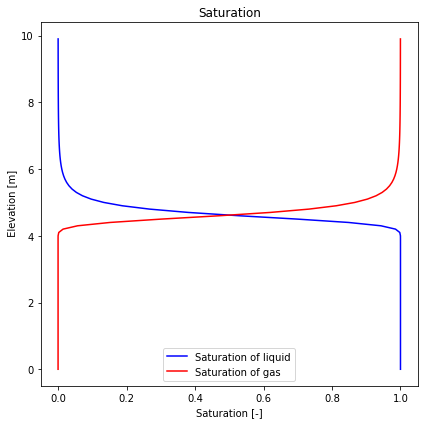

In [263]:
fig = plt.figure(figsize=(6,6))

plt.title('Saturation')
plt.plot(data_results['Saturation of liquid [s_l] [-]'], z, 'b', label='Saturation of liquid')
plt.plot(data_results['Saturation of gas [s_g] [-]'], z, 'r', label='Saturation of gas')

plt.xlabel('Saturation [-]')
plt.ylabel(' Elevation [m]')
plt.tight_layout()
plt.legend()
#plt.show()

In [274]:
### Plotting Richards water content

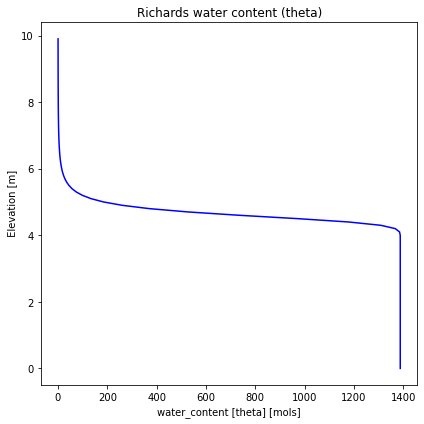

In [275]:
fig = plt.figure(figsize=(6,6))

plt.title('Richards water content (theta)')
plt.plot(data_results['water_content [theta] mols'],z, 'b')

plt.xlabel('water_content [theta] [mols]')
plt.ylabel(' Elevation [m]')
plt.tight_layout()
#plt.show()

### Plotting

In [270]:
data_results.columns

Index(['cell_volume', 'mass_density [rho_l] [kg m^{-3}]',
       'molar_density [n_l] [mol m^{-3}]', 'Absolute permeability [K] (m^{2})',
       'Porosity [phi] (-)', 'Water pressure [p] [Pa]',
       'Relative permeability [kr] [-]', 'Saturation of gas [s_g] [-]',
       'Saturation of liquid [s_l] [-]', 'Temperature [T] [K]',
       'viscosity_liquid [v] Pas]', 'water_content [theta] mols',
       'Pressure head [m]', 'Elevation head [m]', 'Hydraulic head [m]',
       'Atmospheric pressure head [m]'],
      dtype='object')